## ### MDSI Advanced Machine Learning Applications

**Student: Ivan Cheung**

**Assignment: Kaggle 1**


Model: Logistic Regression (Week 1)

This model was built during week 1 (14/08 - 20/08) by applying a logistic regression against the numeric features.
This notebook is a reproduction of the week 1 modelling work, with clean steps and added commentary. 

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder   ## for normalising the feature data
from sklearn.model_selection import train_test_split              ## making test/train splits, for producing AUROC score?
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as mp
import seaborn as sb
from joblib import dump
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [19]:
## Load training and test data set.
nba_train = pd.read_csv('../data/raw/train.csv')
nba_test = pd.read_csv('../data/raw/test.csv')

C:\Users\Ivan\AppData\Local\Temp\ipykernel_24600\1916324903.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  nba_train = pd.read_csv('../data/raw/train.csv')


#### Pre-processing Steps:

1) Remove columns with invalid data points
2) Remove categorical features
3) Extract target column from features
4) Replace null vales with '0'

In [3]:
## columns to drop:
# team / conf - descriptive details about players (their conference and their team) will not  be used as a feature
# ftr - no description given, removed from feature analysis
# yr - player year details are descriptive, need to vectorise in future modelling
# ht - player height data has been corrupted
# num - payer number not relevant as a feature
# pfr - no description given, removed from feature analysis
# type - metadata field not relevant as a feature
# year - no longitudinal inclusion for feature modeling
# drafted - remove the target column in the training data
# player_id - remove player_id, matching to player id in training data not required
df = nba_train.drop(["drafted", "player_id", "team", "conf", "ht", "yr", "num", "type" ,"year", "ftr", "pfr"], axis = 1)

target = nba_train.pop("drafted")

## because 30 columns have null values, replace nulls with 0
df = df.fillna(0)

#### Feature Engineering Steps:

1) Apply a Standard Scalar to numeric features

In [4]:
## Scaling - normalise the range of variables
sc = StandardScaler()
df = sc.fit_transform(df)

#### Modelling Steps:

1) Split training data into train and test set
2) Fit train set into Logistic Regression Classifier model

In [5]:
## splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=8)

## Perform Logistic Regression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Model Analysis:

1) Predit target on test set.
2) Generate confusion matrix
3) Generate AUROC score and ROC curve

In [13]:
## Predict on test set
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)[:,1]


Text(0.5, 23.52222222222222, 'Predicted label')

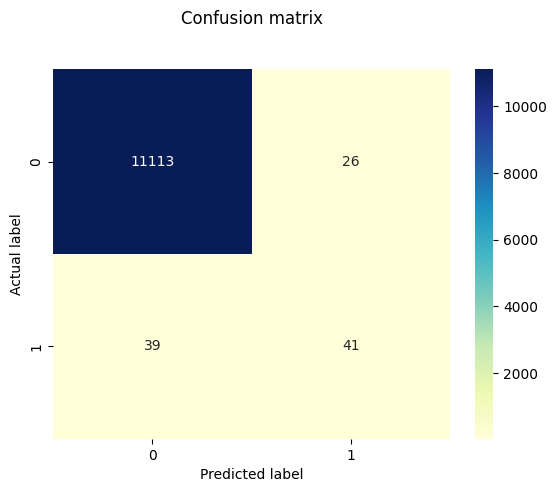

In [7]:
## Confusion Matrix
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

sb.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
mp.title('Confusion matrix', y=1.1)
mp.ylabel('Actual label')
mp.xlabel('Predicted label')

In [15]:
## Calculate AUROC

auroc = roc_auc_score(y_test, y_pred_proba)
print("AUROC score: ", auroc)

AUROC score:  0.9967894335218601


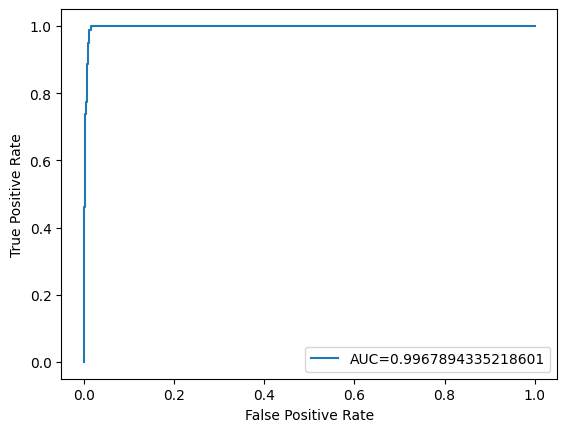

In [18]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
## ROC Curve

mp.plot(fpr, tpr, label="AUC="+str(auroc))
mp.ylabel('True Positive Rate')
mp.xlabel('False Positive Rate')
mp.legend(loc=4)
mp.show()

#### Predict Target Classification on test data

1) Predict target
2) Save Target as Submission
3) Save model files

In [20]:
# Preprocessing:

## pop player ID out
test_player_id = nba_test.pop('player_id').to_frame()
#remove cols not being tested
nba_test = nba_test.drop(["team", "conf", "ht", "yr", "num", "type" ,"year", "ftr", "pfr"], axis = 1)

# 1) fillna
nba_test = nba_test.fillna(0)
# 2) normalise values
test_clean = sc.fit_transform(nba_test)

In [21]:
## predict values
test_pred = classifier.predict_proba(test_clean)

## Round prediction to 2 decimals.
test_pred_drafted = np.round(test_pred[:, 1], 2)

## append predictions to player_ids
test_player_id['drafted'] = test_pred_drafted.tolist()


In [ ]:
# Save predictions to file
test_player_id.to_csv('../data/processed/submission.csv', index=False)

In [ ]:
## Save processed files
X_train.tofile('../data/processed/X_train.csv')
X_test.tofile('../data/processed/X_test.csv')
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# Save model
dump(classifier, '../models/logistic_regression_1.joblib')